## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns= ['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Como no exercício anterior a árvore de profundidade = 8 se mostrou a mais eficiente, apenas essa árvore será utilizada neste exercício.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [47]:
tree_8 = DecisionTreeRegressor(max_depth= 8, random_state= 0)

In [48]:
tree_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [49]:
path = tree_8.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.56919407e-15, 1.41242938e-05, 5.64971751e-05,
        1.27118644e-04, 1.27118644e-04, 2.25988701e-04, 2.25988701e-04,
        5.08474576e-04, 5.69679849e-04, 6.92090395e-04, 7.95668550e-04,
        9.03954802e-04, 9.03954802e-04, 1.01694915e-03, 1.35969868e-03,
        1.41242938e-03, 1.70903955e-03, 2.03389831e-03, 3.18267420e-03,
        3.41807910e-03, 3.43220339e-03, 4.08192090e-03, 4.08192090e-03,
        4.08192090e-03, 4.08192090e-03, 4.52448211e-03, 4.82109228e-03,
        5.20009416e-03, 6.10169492e-03, 8.13559322e-03, 9.94713479e-03,
        1.02966102e-02, 1.39571563e-02, 1.58700565e-02, 2.26082863e-02,
        2.56355932e-02, 2.79684557e-02, 3.01318267e-02, 3.08898305e-02,
        3.22411331e-02, 3.44656309e-02, 3.65433145e-02, 3.95645009e-02,
        4.07203390e-02, 4.42984934e-02, 4.77336281e-02, 4.81586225e-02,
        5.08474576e-02, 5.36746704e-02, 5.55210295e-02, 6.01177024e-02,
        6.15254237e-02, 6.23804143e-02, 6.54412735

In [50]:
alphas, impurities = path.ccp_alphas, path.impurities

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [51]:
clfs = []

for alpha in alphas:
    clf = DecisionTreeRegressor(ccp_alpha= alpha, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [52]:
mse_train = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
mse_test = [mean_squared_error(y_test, clf.predict(X_test))for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

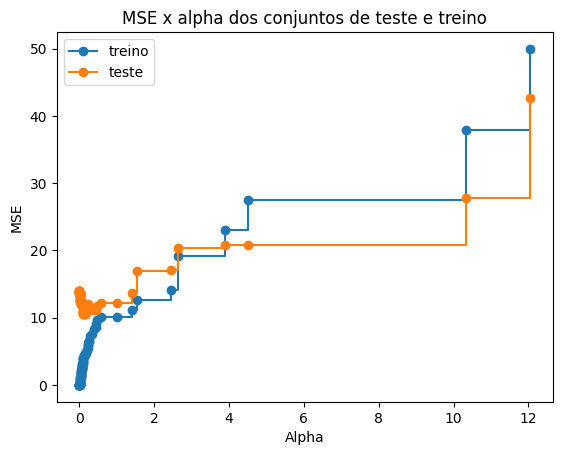

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha dos conjuntos de teste e treino')
ax.plot(alphas[:-1], mse_train[:-1], marker = 'o', label = 'treino', drawstyle = 'steps-post')
ax.plot(alphas[:-1], mse_test[:-1], marker = 'o', label = 'teste', drawstyle = 'steps-post')
ax.legend()
plt.show()

Pelo gráfico, podemos inferir que a melhor árvore é aquela com valor de ccp_alpha de 1.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [56]:
tree_final = DecisionTreeRegressor(random_state=0, ccp_alpha=1)
tree_final.fit(X_train,y_train)
tree_final.score(X_test,y_test)

0.8323754869272513

### 7. Visualize esta árvore.

[Text(0.47058823529411764, 0.9, 'lstat <= 7.685\nsquared_error = 89.344\nsamples = 354\nvalue = 22.61'),
 Text(0.23529411764705882, 0.7, 'rm <= 7.437\nsquared_error = 80.056\nsamples = 105\nvalue = 32.273'),
 Text(0.11764705882352941, 0.5, 'dis <= 1.485\nsquared_error = 38.846\nsamples = 83\nvalue = 28.992'),
 Text(0.058823529411764705, 0.3, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.17647058823529413, 0.3, 'rm <= 6.728\nsquared_error = 23.131\nsamples = 80\nvalue = 28.204'),
 Text(0.11764705882352941, 0.1, 'squared_error = 6.656\nsamples = 42\nvalue = 24.964'),
 Text(0.23529411764705882, 0.1, 'squared_error = 16.922\nsamples = 38\nvalue = 31.784'),
 Text(0.35294117647058826, 0.5, 'crim <= 2.742\nsquared_error = 41.603\nsamples = 22\nvalue = 44.655'),
 Text(0.29411764705882354, 0.3, 'squared_error = 17.755\nsamples = 21\nvalue = 45.738'),
 Text(0.4117647058823529, 0.3, 'squared_error = -0.0\nsamples = 1\nvalue = 21.9'),
 Text(0.7058823529411765, 0.7, 'lstat <= 14.985\ns

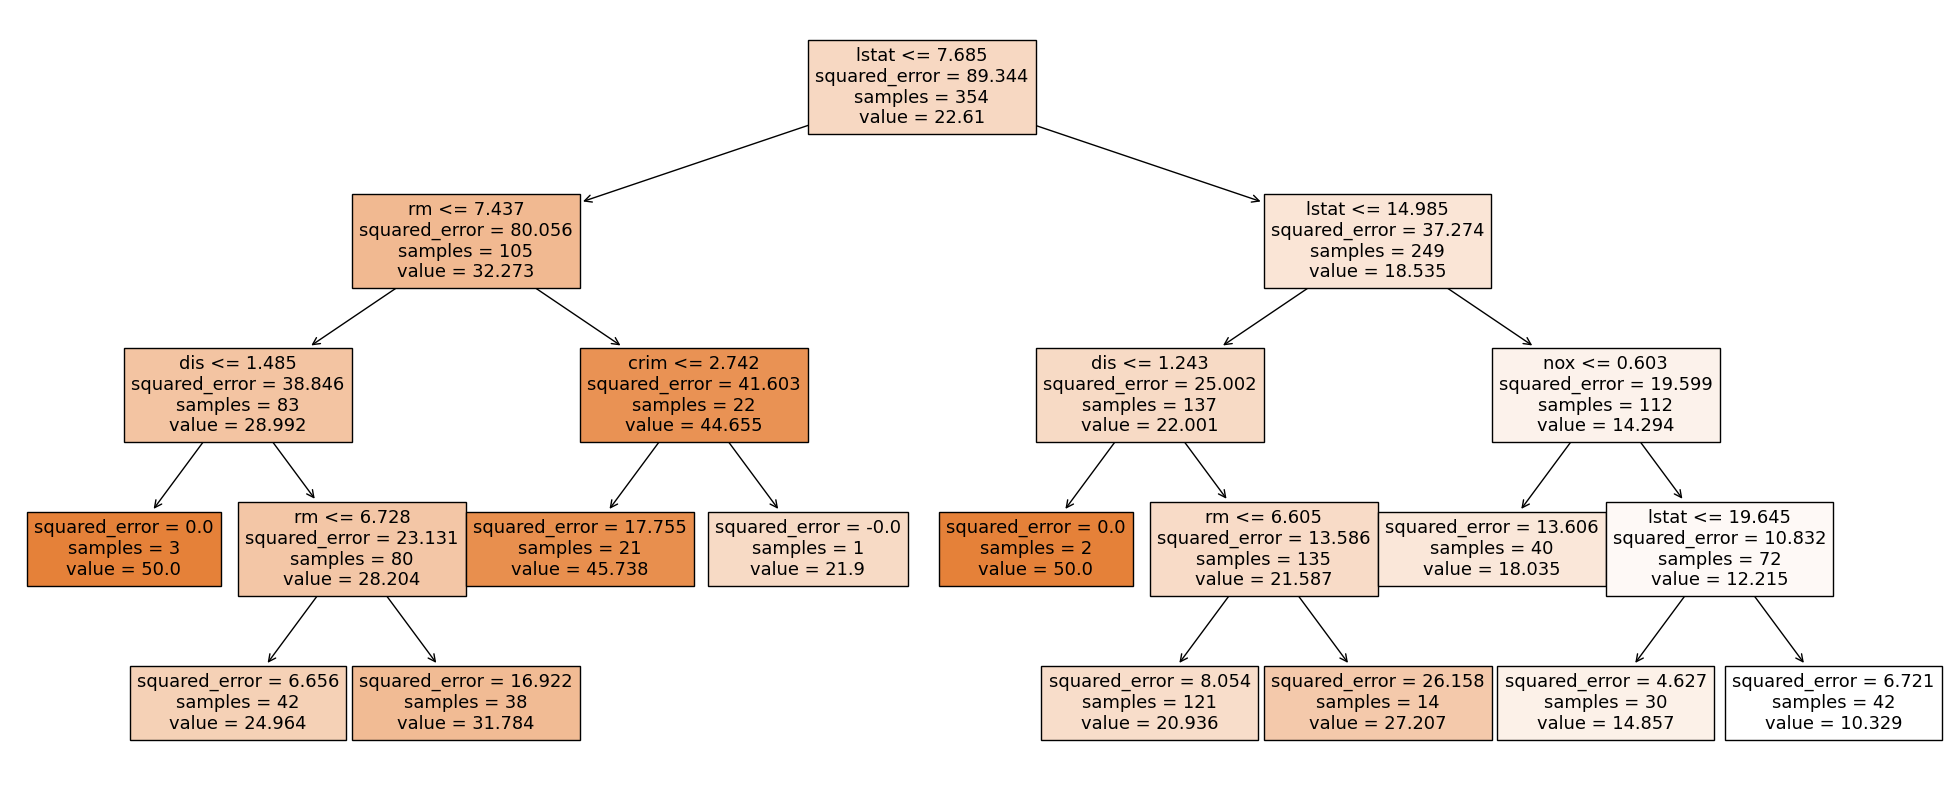

In [57]:
plt.figure(figsize=(25, 10))
plot_tree(tree_final,
          filled=True,
          feature_names=X.columns)